#### ¿En qué medida los nutrientes clave (por 100 g) permiten predecir el puntaje Nutri-Score de los productos alimenticios?

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np

conn = mysql.connector.connect(
    host="localhost",
    user="root",      
    password="",   
    database="foodfacts"
)

cursor = conn.cursor()
print("Succesfully Connected to MySQL database!")

Succesfully Connected to MySQL database!


In [17]:
query = """
SELECT
  p.nutriscore_score,
  p.proteins_100g AS proteins,
  p.sugars_100g   AS sugars,
  p.energy_100g   AS energy,
  p.fat_100g      AS fat,
  p.salt_100g     AS salt,
  p.sodium_100g   AS sodium
FROM foodfacts.products p;
"""

# Leer query en un DataFrame
df= pd.read_sql(query, conn)

# Guardar en CSV
df.to_csv(r"C:\MDA\2025\Term_1\Data Analytics case study 1 (DAMO 501-12)\Assigment_1\Part_2\Table_Foodfacts_v7.csv", index=False)
print("\nDataFrame saved to CSV file successfully!.")
print("\n=== DataFrame Information ===")
df.info()



DataFrame saved to CSV file successfully!.

=== DataFrame Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nutriscore_score  7992 non-null   float64
 1   proteins          10810 non-null  float64
 2   sugars            10170 non-null  float64
 3   energy            10808 non-null  float64
 4   fat               10857 non-null  float64
 5   salt              10458 non-null  float64
 6   sodium            10458 non-null  float64
dtypes: float64(7)
memory usage: 604.2 KB


C:\Users\F_ver\AppData\Local\Temp\ipykernel_13476\1994793672.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, conn)


In [18]:
df_foodfacts2 = pd.read_csv(r"C:\MDA\2025\Term_1\Data Analytics case study 1 (DAMO 501-12)\Assigment_1\Part_2\Table_Foodfacts_v7.csv")
# Se eliminan valores nulos para nutriscore
df_foodfacts2 = df_foodfacts2.dropna(subset=['nutriscore_score'])
# Se completan los valores nulos con la mediana de cada columna
df_foodfacts2[['proteins','sugars','energy','fat','salt','sodium']] = df_foodfacts2[['proteins','sugars','energy','fat','salt','sodium']].fillna(df_foodfacts2[['proteins','sugars','energy','fat','salt','sodium']].median())
print("\n=== DataFrame Information after cleaning ===")
print(df_foodfacts2.info())
print("\n=== Median of each nutrient column ===")
print(df_foodfacts2[['proteins','sugars','energy','fat','salt','sodium']].median().round(3))
print("\n=== Summary Statistics ===")
print(df_foodfacts2.describe().round(3))




=== DataFrame Information after cleaning ===
<class 'pandas.core.frame.DataFrame'>
Index: 7992 entries, 4 to 11045
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nutriscore_score  7992 non-null   float64
 1   proteins          7992 non-null   float64
 2   sugars            7992 non-null   float64
 3   energy            7992 non-null   float64
 4   fat               7992 non-null   float64
 5   salt              7992 non-null   float64
 6   sodium            7992 non-null   float64
dtypes: float64(7)
memory usage: 499.5 KB
None

=== Median of each nutrient column ===
proteins      3.530
sugars        4.200
energy      895.000
fat           2.100
salt          0.424
sodium        0.170
dtype: float64

=== Summary Statistics ===
       nutriscore_score  proteins    sugars      energy       fat      salt  \
count          7992.000  7992.000  7992.000    7992.000  7992.000  7992.000   
mean              9.2

### Test de normalidad

Test de Shapiro–Wilk para normalidad

nutriscore_score   -> W=0.969, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



c:\Users\F_ver\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7992.
  res = hypotest_fun_out(*samples, **kwds)


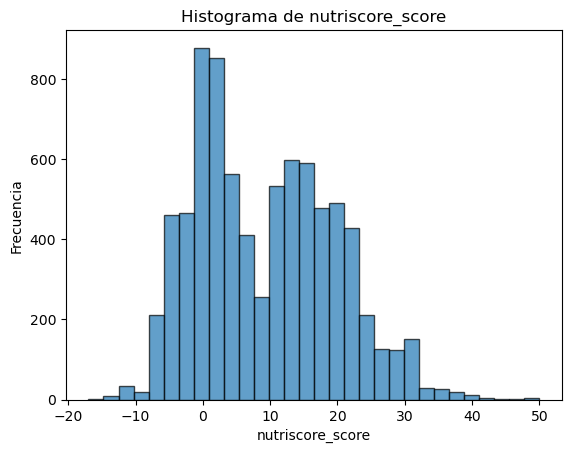

proteins           -> W=0.142, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



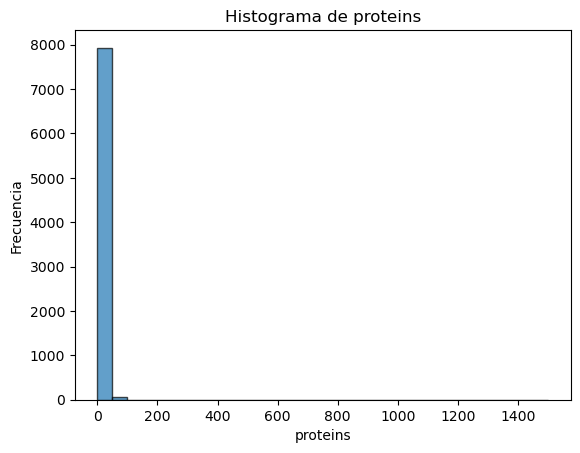

sugars             -> W=0.368, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



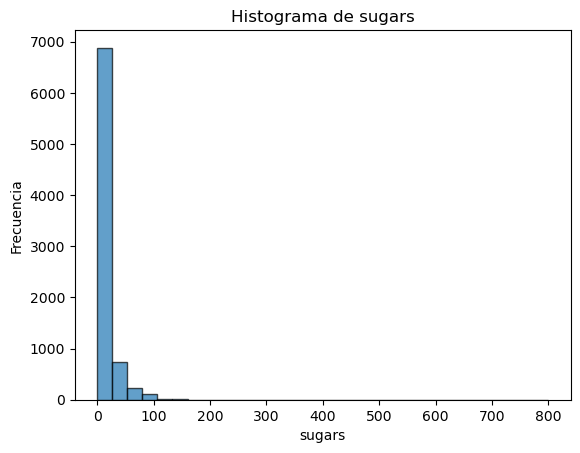

energy             -> W=0.351, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



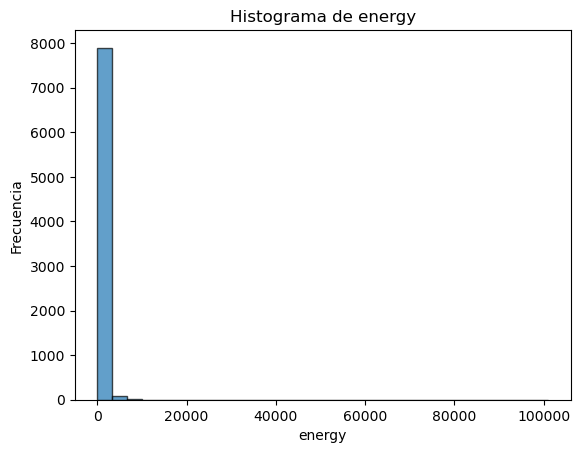

fat                -> W=0.618, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



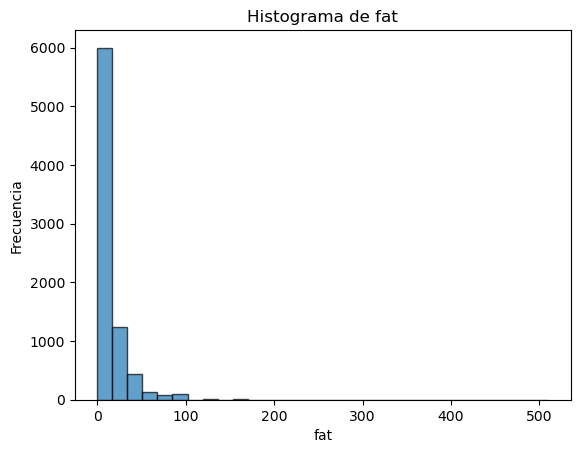

salt               -> W=0.070, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



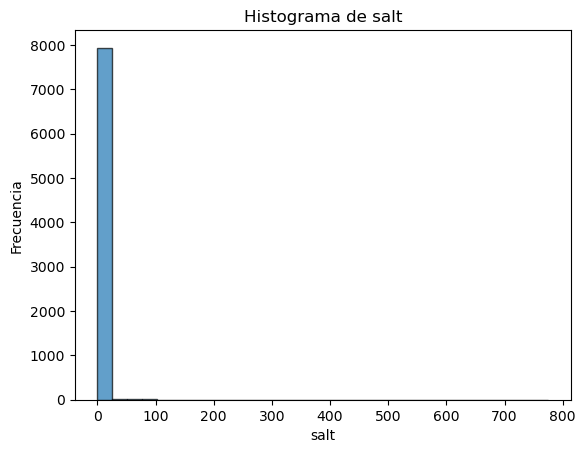

sodium             -> W=0.070, p=0.00000
   ✘ Se rechaza normalidad (distribución no normal)



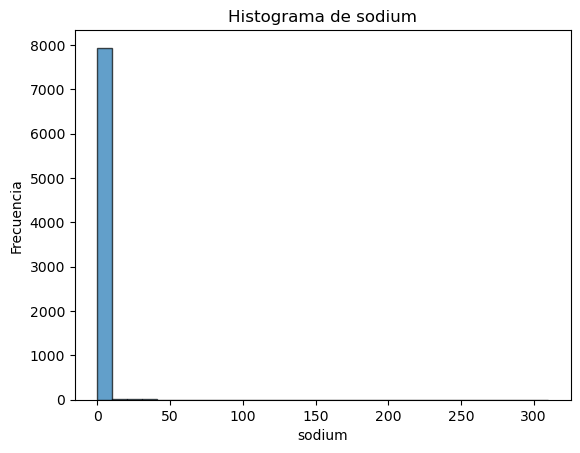

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Columnas a verificar
cols = ["nutriscore_score","proteins","sugars","energy","fat","salt","sodium"]

print("Test de Shapiro–Wilk para normalidad\n")
for col in cols:
    data = df_foodfacts2[col].dropna()
    stat, p = shapiro(data)
    print(f"{col:18} -> W={stat:.3f}, p={p:.5f}")
    if p >= 0.05:
        print("   ✔ No se rechaza normalidad (distribución compatible con normal)\n")
    else:
        print("   ✘ Se rechaza normalidad (distribución no normal)\n")
    
    # Histograma
    plt.hist(data, bins=30, edgecolor="black", alpha=0.7)
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


### Verificar la correlacion (Spearman) y P-value

Spearman: Nutri-Score vs nutrientes

proteins   -> ρ=0.063, p=0.000000 ✔ Correlación significativa
sugars     -> ρ=0.400, p=0.000000 ✔ Correlación significativa
energy     -> ρ=0.537, p=0.000000 ✔ Correlación significativa
fat        -> ρ=0.468, p=0.000000 ✔ Correlación significativa
salt       -> ρ=0.493, p=0.000000 ✔ Correlación significativa
sodium     -> ρ=0.493, p=0.000000 ✔ Correlación significativa


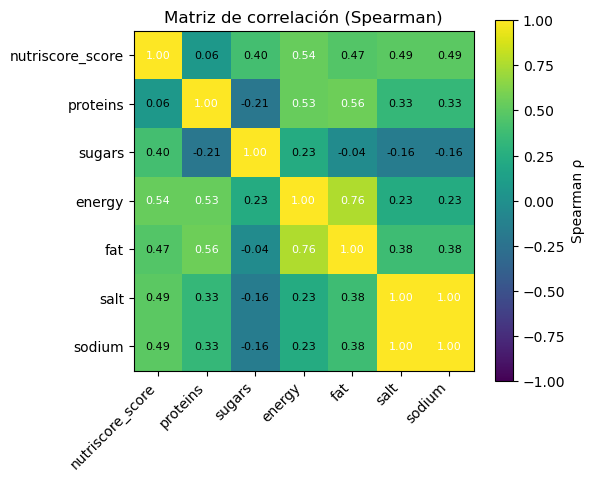

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Variables
cols = ["nutriscore_score","proteins","sugars","energy","fat","salt","sodium"]

# 1) Correlación Spearman: Nutri-Score vs cada nutriente (ρ y p-value)
print("Spearman: Nutri-Score vs nutrientes\n")
for var in cols[1:]:
    rho, p = spearmanr(df_foodfacts2["nutriscore_score"], df_foodfacts2[var], nan_policy="omit")
    print(f"{var:10} -> ρ={rho:.3f}, p={p:.6f} {'✔ Correlación significativa' if p < 0.05 else '✘ No significativa'}")

# 2) Matriz Spearman y Heatmap
corr = df_foodfacts2[cols].corr(method="spearman")

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(corr, vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(cols))); ax.set_xticklabels(cols, rotation=45, ha="right")
ax.set_yticks(np.arange(len(cols))); ax.set_yticklabels(cols)
for i in range(len(cols)):
    for j in range(len(cols)):
        val = corr.iloc[i, j]
        ax.text(j, i, f"{val:.2f}", ha="center", va="center",
                color=("white" if abs(val) > 0.5 else "black"), fontsize=8)
cbar = plt.colorbar(im); cbar.set_label("Spearman ρ")
ax.set_title("Matriz de correlación (Spearman)")
plt.tight_layout(); plt.show()


### Modelo de regresion lineal multiple

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Variables
X = df_foodfacts2[["proteins","sugars","energy","fat","salt","sodium"]].dropna()
y = df_foodfacts2.loc[X.index, "nutriscore_score"]

# 1. División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 3. Predicciones
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# 4. Métricas
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)

print("\nR² train:", r2_score(y_train, y_pred_train))
print("R² test:", r2_score(y_test, y_pred_test))

print("RMSE train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coeficientes: [ 8.92447713e-03  1.00653819e-01  3.33942176e-04  1.94777953e-01
 -3.89208585e+02  9.73315259e+02]
Intercepto: 5.023756950421595

R² train: 0.28421578733684494
R² test: 0.2866617739349242
RMSE train: 8.65153545258943
RMSE test: 8.751083582259922


### Identificacion de outliers 

In [22]:
# Detección de outliers con regla 1.5 * IQR
outliers_info = {}

for col in ["nutriscore_score","proteins","sugars","energy","fat","salt","sodium"]:
    data = df_foodfacts2[col].dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data < lower) | (data > upper)]
    
    outliers_info[col] = {
        "total": len(data),
        "outliers": len(outliers),
        "porcentaje_outliers": round(100*len(outliers)/len(data), 2)
    }

# Convertir a tabla
outliers_df = pd.DataFrame(outliers_info).T
print(outliers_df)


                   total  outliers  porcentaje_outliers
nutriscore_score  7992.0       8.0                 0.10
proteins          7992.0     496.0                 6.21
sugars            7992.0     832.0                10.41
energy            7992.0      78.0                 0.98
fat               7992.0     543.0                 6.79
salt              7992.0     463.0                 5.79
sodium            7992.0     463.0                 5.79


### Modelo Mejorado - Eliminar outliers

In [23]:
# Copiamos el dataset original
df_sin_outliers = df_foodfacts2.copy()

# Variables a analizar
variables = ["proteins","sugars","energy","fat","salt","sodium"]

# Eliminación de outliers por la regla 1.5 * IQR
for var in variables:
    Q1 = df_sin_outliers[var].quantile(0.25)
    Q3 = df_sin_outliers[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_sin_outliers = df_sin_outliers[(df_sin_outliers[var] >= lower) & (df_sin_outliers[var] <= upper)]

print("Tamaño original:", df_foodfacts2.shape)
print("Tamaño sin outliers:", df_sin_outliers.shape)


Tamaño original: (7992, 7)
Tamaño sin outliers: (5679, 7)


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables predictoras y target
X = df_sin_outliers[["proteins","sugars","energy","fat","salt","sodium"]]
y = df_sin_outliers["nutriscore_score"]

# 1. División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 3. Predicciones
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# 4. Métricas
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)

print("\nR² train:", r2_score(y_train, y_pred_train))
print("R² test:", r2_score(y_test, y_pred_test))

print("RMSE train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coeficientes: [-2.54711026e-01  4.19636084e-01  2.67617371e-04  4.68954987e-01
 -2.36701547e+02  6.03622115e+02]
Intercepto: -1.7742035585779004

R² train: 0.739856977852047
R² test: 0.7473475436138874
RMSE train: 4.18253360410669
RMSE test: 4.183499228724735


### Modelo Mejorado - Transformacion logaritmica

In [25]:
import numpy as np

# Copiar el DataFrame original
df_log = df_foodfacts2.copy()

# Variables predictoras
variables = ["proteins","sugars","energy","fat","salt","sodium"]

# Transformación logarítmica en todas las X
for col in variables:
    df_log[col] = np.log1p(df_log[col].clip(lower=0))  # log(1+x)

# Vista previa de las variables transformadas
print(df_log[variables].head())


    proteins    sugars    energy       fat      salt    sodium
4   3.465736  0.095310  7.101676  3.044522  1.609438  0.955511
5   2.186051  2.397895  7.654443  3.367296  0.336472  0.148420
6   3.465736  0.587787  7.200425  3.077312  1.757858  1.071584
7   2.091864  1.808289  7.382746  3.044522  0.652325  0.313350
11  2.116256  3.555348  7.717796  3.637586  0.095310  0.039221


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables predictoras y target
X = df_log[["proteins","sugars","energy","fat","salt","sodium"]]
y = df_log["nutriscore_score"]

# 1. División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 3. Predicciones
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)

# 4. Métricas
print("Coeficientes:", lin_reg.coef_)
print("Intercepto:", lin_reg.intercept_)

print("\nR² train:", r2_score(y_train, y_pred_train))
print("R² test:", r2_score(y_test, y_pred_test))

print("RMSE train:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Coeficientes: [ -1.48378554   3.91542944  -0.1691278    3.2712439   16.88331495
 -12.9689465 ]
Intercepto: -4.473097440396391

R² train: 0.677729130314381
R² test: 0.6838873376791024
RMSE train: 5.805139488791064
RMSE test: 5.825524449902979


### Comparativa de resultados para cada modelo

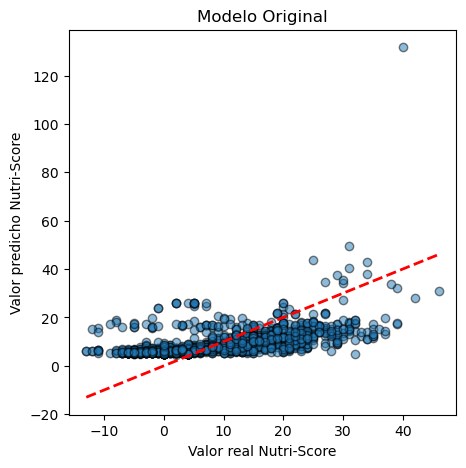

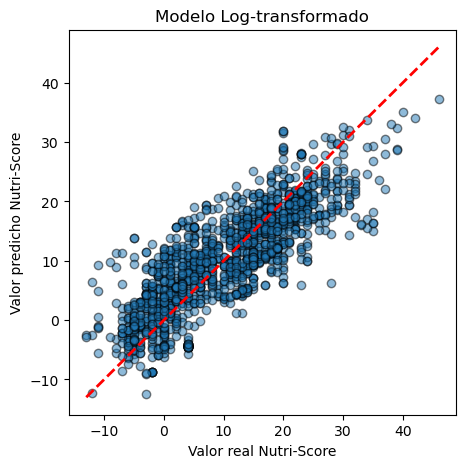

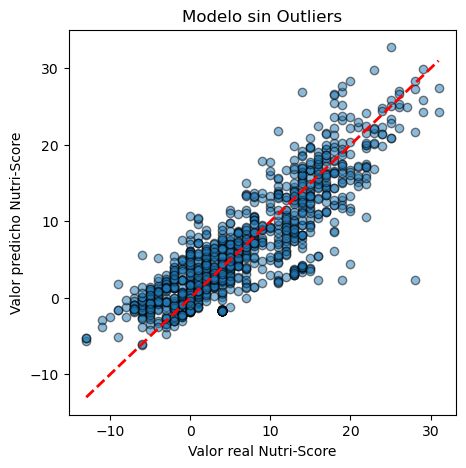

In [27]:
import matplotlib.pyplot as plt

def plot_resultados(y_test, y_pred, titulo):
    plt.figure(figsize=(5,5))
    plt.scatter(y_test, y_pred, alpha=0.5, edgecolor="k")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    plt.xlabel("Valor real Nutri-Score")
    plt.ylabel("Valor predicho Nutri-Score")
    plt.title(titulo)
    plt.show()

# --- Modelo Original ---
X = df_foodfacts2[["proteins","sugars","energy","fat","salt","sodium"]].dropna()
y = df_foodfacts2.loc[X.index, "nutriscore_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
plot_resultados(y_test, y_pred, "Modelo Original")

# --- Modelo Log-transformado ---
X = df_log[["proteins","sugars","energy","fat","salt","sodium"]]
y = df_log["nutriscore_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
plot_resultados(y_test, y_pred, "Modelo Log-transformado")

# --- Modelo sin Outliers ---
X = df_sin_outliers[["proteins","sugars","energy","fat","salt","sodium"]]
y = df_sin_outliers["nutriscore_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
plot_resultados(y_test, y_pred, "Modelo sin Outliers")


### Ecuaciones de cada modelo

In [28]:
# === Mostrar las ecuaciones de cada modelo de regresión ===

# Guardamos los modelos entrenados en un diccionario con su nombre descriptivo
modelos = {
    "Modelo Original": (lin_reg, ["proteins","sugars","energy","fat","salt","sodium"], df_foodfacts2),
    "Modelo Log-transformado": (lin_reg, ["proteins","sugars","energy","fat","salt","sodium"], df_log),
    "Modelo sin Outliers": (lin_reg, ["proteins","sugars","energy","fat","salt","sodium"], df_sin_outliers)
}

# Reentrenar y mostrar ecuación para cada modelo
for nombre, (modelo, features, df) in modelos.items():
    X = df[features]
    y = df["nutriscore_score"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    modelo.fit(X_train, y_train)
    
    # Construcción de la ecuación
    ecuacion = " + ".join(f"({coef:.3f})*{var}" for coef, var in zip(modelo.coef_, features))
    ecuacion += f" + ({modelo.intercept_:.3f})"
    
    print(f"{nombre}:\ny = {ecuacion}\n")


Modelo Original:
y = (0.009)*proteins + (0.101)*sugars + (0.000)*energy + (0.195)*fat + (-389.209)*salt + (973.315)*sodium + (5.024)

Modelo Log-transformado:
y = (-1.484)*proteins + (3.915)*sugars + (-0.169)*energy + (3.271)*fat + (16.883)*salt + (-12.969)*sodium + (-4.473)

Modelo sin Outliers:
y = (-0.255)*proteins + (0.420)*sugars + (0.000)*energy + (0.469)*fat + (-236.702)*salt + (603.622)*sodium + (-1.774)

